# Application of Machine Learning Methods to Analysis of Cyber-Sport Events
## Dmitry Savostyanov, 131

## Витрина данных по участникам Kiev Major

## Финальный файл скрипта: ABT_[DATE].csv

В данном скрипте представлена таблица по командам, которые указаны в файле Dota Features & Snippets - Roles.csv за период с 1 января 2017 года по сегодняшний день. Строка таблицы - информация о матче на уровне игрока. Т.е. если между IG и LGD был матч с match_id = 12345, то таблица содержит 10 записей с данным идентификаторм для каждого конкретного account_id.

In [1]:
import urllib2
import json
import random
import datetime

import math 
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt 
from sklearn import svm, datasets 
%matplotlib inline
plt.style.use('ggplot')

In [2]:
urlQuery = "https://api.opendota.com/api/explorer?sql=SELECT%0A%0A--%20Basic%20table%0Amatches.match_id%2C%0Aplayer_matches.account_id%2C%0Ateams.team_id%2C%0Amatches.leagueid%2C%0Aleagues.name%20leaguename%2C%0Amatches.start_time%2C%0Aplayer_matches.hero_id%2C%0Aplayer_matches.player_slot%2C%0A((player_matches.player_slot%20%3C%20128)%20%3D%20matches.radiant_win)%20win%2C%0Aplayer_matches.deaths%2C%0Aplayer_matches.assists%2C%0Aplayer_matches.gold_per_min%20%2C%0Aplayer_matches.xp_per_min%20%2C%0Aplayer_matches.gold_spent%20%2C%0Aplayer_matches.hero_damage%20%2C%0Aplayer_matches.tower_damage%20%2C%0Aplayer_matches.stuns%20%2C%0Aplayer_matches.creeps_stacked%20%2C%0Aplayer_matches.camps_stacked%20%2C%0Aplayer_matches.hero_healing%20%2C%0Amatches.duration%2C%0Amatches.cluster%2C%0Amatches.first_blood_time%2C%0A%0A--timeStamp%20variables%0Aplayer_matches.gold_t%5B3%5D%20t_Gold_cnt_3%2C%0Aplayer_matches.gold_t%5B5%5D%20t_Gold_cnt_5%2C%0Aplayer_matches.gold_t%5B8%5D%20t_Gold_cnt_8%2C%0Aplayer_matches.gold_t%5B10%5D%20t_Gold_cnt_10%2C%0Aplayer_matches.gold_t%5B12%5D%20t_Gold_cnt_12%2C%0Aplayer_matches.gold_t%5B15%5D%20t_Gold_cnt_15%2C%0Aplayer_matches.gold_t%5B20%5D%20t_Gold_cnt_20%2C%0Aplayer_matches.gold_t%5B25%5D%20t_Gold_cnt_25%2C%0Aplayer_matches.gold_t%5B30%5D%20t_Gold_cnt_30%2C%0A%0Aplayer_matches.lh_t%5B3%5D%20t_LastHits_cnt_3%2C%0Aplayer_matches.lh_t%5B5%5D%20t_LastHits_cnt_5%2C%0Aplayer_matches.lh_t%5B8%5D%20t_LastHits_cnt_8%2C%0Aplayer_matches.lh_t%5B10%5D%20t_LastHits_cnt_10%2C%0Aplayer_matches.lh_t%5B12%5D%20t_LastHits_cnt_12%2C%0Aplayer_matches.lh_t%5B15%5D%20t_LastHits_cnt_15%2C%0Aplayer_matches.lh_t%5B20%5D%20t_LastHits_cnt_20%2C%0Aplayer_matches.lh_t%5B25%5D%20t_LastHits_cnt_25%2C%0Aplayer_matches.lh_t%5B30%5D%20t_LastHits_cnt_30%2C%0A%0Aplayer_matches.xp_t%5B3%5D%20t_Experience_cnt_3%2C%0Aplayer_matches.xp_t%5B5%5D%20t_Experience_cnt_5%2C%0Aplayer_matches.xp_t%5B8%5D%20t_Experience_cnt_8%2C%0Aplayer_matches.xp_t%5B10%5D%20t_Experience_cnt_10%2C%0Aplayer_matches.xp_t%5B12%5D%20t_Experience_cnt_12%2C%0Aplayer_matches.xp_t%5B15%5D%20t_Experience_cnt_15%2C%0Aplayer_matches.xp_t%5B20%5D%20t_Experience_cnt_20%2C%0Aplayer_matches.xp_t%5B25%5D%20t_Experience_cnt_25%2C%0Aplayer_matches.xp_t%5B30%5D%20t_Experience_cnt_30%2C%0A%0Aplayer_matches.pings%20ping_log%2C%0Aplayer_matches.obs_log%2C%0Aplayer_matches.sen_log%2C%0Aplayer_matches.runes_log%2C%0Aplayer_matches.kills_log%2C%0Aplayer_matches.buyback_log%2C%0A%0A--table_heroStats%0Aheroes.localized_name%2C%0Aheroes.attack_type%2C%0Aheroes.primary_attr%2C%0Aheroes.roles%20role_log%2C%0A%0A--purchase_log%0Aplayer_matches.purchase_log%0A%0A%0AFROM%20matches%0AJOIN%20match_patch%20using(match_id)%0AJOIN%20leagues%20using(leagueid)%0AJOIN%20player_matches%20using(match_id)%0ALEFT%20JOIN%20notable_players%20using(account_id)%0ALEFT%20JOIN%20teams%20using(team_id)%0AJOIN%20heroes%20ON%20player_matches.hero_id%20%3D%20heroes.id%0A%0A%0AWHERE%20TRUE%0AAND%20teams.team_id%20in%0A%20%20%20%20(%0A%20%20%20%203%2C%0A%20%20%20%204%2C%0A%20%20%20%205%2C%0A%20%20%20%2015%2C%0A%20%20%20%2024%2C%0A%20%20%20%2036%2C%0A%20%20%20%2039%2C%0A%20%20%20%202163%2C%0A%20%20%20%20111474%2C%0A%20%20%20%20350190%2C%0A%20%20%20%20543897%2C%0A%20%20%20%20726228%2C%0A%20%20%20%201061269%2C%0A%20%20%20%201105664%2C%0A%20%20%20%201148284%2C%0A%20%20%20%201272244%2C%0A%20%20%20%201276785%2C%0A%20%20%20%201375614%2C%0A%20%20%20%201520578%2C%0A%20%20%20%201836806%2C%0A%20%20%20%201838315%2C%0A%20%20%20%201883502%2C%0A%20%20%20%202006913%2C%0A%20%20%20%202108395%2C%0A%20%20%20%202512249%2C%0A%20%20%20%202533075%2C%0A%20%20%20%202537636%2C%0A%20%20%20%202538753%2C%0A%20%20%20%202552670%2C%0A%20%20%20%202586976%2C%0A%20%20%20%202626685%2C%0A%20%20%20%202640025%2C%0A%20%20%20%202642171%2C%0A%20%20%20%202659468%2C%0A%20%20%20%202672298%2C%0A%20%20%20%202677025%2C%0A%20%20%20%202701329%2C%0A%20%20%20%202783913%2C%0A%20%20%20%202860081%2C%0A%20%20%20%202880140%2C%0A%20%20%20%203214108%2C%0A%20%20%20%203326126%2C%0A%20%20%20%203326875%2C%0A%20%20%20%203331948%0A%20%20%20%20)%0AAND%20matches.start_time%20%3E%3D%201483218000%0AORDER%20BY%20matches.match_id%20DESC%20NULLS%20LAST%0A--LIMIT%20200"

In [3]:
urlQuery = "https://api.opendota.com/api/explorer?sql=SELECT%0D%0A%0D%0A--%20Basic%20table%0D%0Amatches.match_id%2C%0D%0Aplayer_matches.account_id%2C%0D%0Ateams.team_id%2C%0D%0Amatches.leagueid%2C%0D%0Aleagues.name%20leaguename%2C%0D%0Amatches.start_time%2C%0D%0Aplayer_matches.hero_id%2C%0D%0Aplayer_matches.player_slot%2C%0D%0A((player_matches.player_slot%20%3C%20128)%20%3D%20matches.radiant_win)%20win%2C%0D%0Aplayer_matches.kills%2C%0D%0Aplayer_matches.deaths%2C%0D%0Aplayer_matches.assists%2C%0D%0Aplayer_matches.gold_per_min%20%2C%0D%0Aplayer_matches.xp_per_min%20%2C%0D%0Aplayer_matches.gold_spent%20%2C%0D%0Aplayer_matches.hero_damage%20%2C%0D%0Aplayer_matches.tower_damage%20%2C%0D%0Aplayer_matches.stuns%20%2C%0D%0Aplayer_matches.creeps_stacked%20%2C%0D%0Aplayer_matches.camps_stacked%20%2C%0D%0Aplayer_matches.hero_healing%20%2C%0D%0Aplayer_matches.last_hits%2C%0D%0Aplayer_matches.denies%2C%0D%0Aplayer_matches.level%2C%0D%0Amatches.duration%2C%0D%0Amatches.cluster%2C%0D%0Amatches.first_blood_time%2C%0D%0A%0D%0A--timeStamp%20variables%0D%0Aplayer_matches.gold_t%5B3%5D%20t_Gold_cnt_3%2C%0D%0Aplayer_matches.gold_t%5B5%5D%20t_Gold_cnt_5%2C%0D%0Aplayer_matches.gold_t%5B8%5D%20t_Gold_cnt_8%2C%0D%0Aplayer_matches.gold_t%5B10%5D%20t_Gold_cnt_10%2C%0D%0Aplayer_matches.gold_t%5B12%5D%20t_Gold_cnt_12%2C%0D%0Aplayer_matches.gold_t%5B15%5D%20t_Gold_cnt_15%2C%0D%0Aplayer_matches.gold_t%5B20%5D%20t_Gold_cnt_20%2C%0D%0Aplayer_matches.gold_t%5B25%5D%20t_Gold_cnt_25%2C%0D%0Aplayer_matches.gold_t%5B30%5D%20t_Gold_cnt_30%2C%0D%0A%0D%0Aplayer_matches.lh_t%5B3%5D%20t_LastHits_cnt_3%2C%0D%0Aplayer_matches.lh_t%5B5%5D%20t_LastHits_cnt_5%2C%0D%0Aplayer_matches.lh_t%5B8%5D%20t_LastHits_cnt_8%2C%0D%0Aplayer_matches.lh_t%5B10%5D%20t_LastHits_cnt_10%2C%0D%0Aplayer_matches.lh_t%5B12%5D%20t_LastHits_cnt_12%2C%0D%0Aplayer_matches.lh_t%5B15%5D%20t_LastHits_cnt_15%2C%0D%0Aplayer_matches.lh_t%5B20%5D%20t_LastHits_cnt_20%2C%0D%0Aplayer_matches.lh_t%5B25%5D%20t_LastHits_cnt_25%2C%0D%0Aplayer_matches.lh_t%5B30%5D%20t_LastHits_cnt_30%2C%0D%0A%0D%0Aplayer_matches.xp_t%5B3%5D%20t_Experience_cnt_3%2C%0D%0Aplayer_matches.xp_t%5B5%5D%20t_Experience_cnt_5%2C%0D%0Aplayer_matches.xp_t%5B8%5D%20t_Experience_cnt_8%2C%0D%0Aplayer_matches.xp_t%5B10%5D%20t_Experience_cnt_10%2C%0D%0Aplayer_matches.xp_t%5B12%5D%20t_Experience_cnt_12%2C%0D%0Aplayer_matches.xp_t%5B15%5D%20t_Experience_cnt_15%2C%0D%0Aplayer_matches.xp_t%5B20%5D%20t_Experience_cnt_20%2C%0D%0Aplayer_matches.xp_t%5B25%5D%20t_Experience_cnt_25%2C%0D%0Aplayer_matches.xp_t%5B30%5D%20t_Experience_cnt_30%2C%0D%0A%0D%0Aplayer_matches.pings%20ping_log%2C%0D%0Aplayer_matches.obs_log%2C%0D%0Aplayer_matches.sen_log%2C%0D%0Aplayer_matches.runes_log%2C%0D%0Aplayer_matches.kills_log%2C%0D%0Aplayer_matches.buyback_log%2C%0D%0A%0D%0A--table_heroStats%0D%0Aheroes.localized_name%2C%0D%0Aheroes.attack_type%2C%0D%0Aheroes.primary_attr%2C%0D%0Aheroes.roles%20role_log%2C%0D%0A%0D%0A--purchase_log%0D%0Aplayer_matches.purchase_log%0D%0A%0D%0A%0D%0AFROM%20matches%0D%0AJOIN%20match_patch%20using(match_id)%0D%0AJOIN%20leagues%20using(leagueid)%0D%0AJOIN%20player_matches%20using(match_id)%0D%0ALEFT%20JOIN%20notable_players%20using(account_id)%0D%0ALEFT%20JOIN%20teams%20using(team_id)%0D%0AJOIN%20heroes%20ON%20player_matches.hero_id%20%3D%20heroes.id%0D%0A%0D%0A%0D%0AWHERE%20TRUE%0D%0AAND%20teams.team_id%20in%0D%0A%20%20%20%20(%0D%0A%20%20%20%20%20%205%2C%0D%0A%09%20%2026%2C%0D%0A%09%20%2039%2C%0D%0A%09%20%202163%2C%0D%0A%09%20%201375614%2C%0D%0A%09%20%201836806%2C%0D%0A%09%20%201883502%2C%0D%0A%09%20%202108395%2C%0D%0A%09%20%202512249%2C%0D%0A%09%20%202586976%2C%0D%0A%09%20%202640025%2C%0D%0A%09%20%202642171%2C%0D%0A%09%20%203326875%2C%0D%0A%09%20%203722973%2C%0D%0A%09%20%203580606%2C%0D%0A%09%20%203547682%2C%0D%0A%09%20%204253054%2C%0D%0A%09%20%204251435%2C%0D%0A%09%20%201838315%0D%0A%20%20%20%20)%0D%0AAND%20matches.start_time%20%3E%3D%201483218000%0D%0AORDER%20BY%20matches.match_id%20DESC%20NULLS%20LAST%0D%0A--LIMIT%20200"

# Загружаем данные в формате json, парсим и сохраняем в Pandas

Предварительно ссылку стоит открыть в браузере, иначе она не хочет грузиться (слишком большая?)

In [4]:
response = urllib2.urlopen(urlQuery)
jsonResponse = response.read()
dictData = json.loads(jsonResponse)
matches = pd.DataFrame.from_dict(dictData['rows'])

# Добавляем уникальный идентификатор matchId_accountId и дату

In [5]:
matches['id'] = matches['match_id'].astype('str') + "_" + matches['account_id'].astype('str')
print matches.shape
matches['datetime'] = matches["start_time"].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%d.%m.%Y %H:%M:%S'))

(4429, 66)


Данные содержат 10437 строки.

# Список переменных

In [6]:
list(matches)

[u'account_id',
 u'assists',
 u'attack_type',
 u'buyback_log',
 u'camps_stacked',
 u'cluster',
 u'creeps_stacked',
 u'deaths',
 u'denies',
 u'duration',
 u'first_blood_time',
 u'gold_per_min',
 u'gold_spent',
 u'hero_damage',
 u'hero_healing',
 u'hero_id',
 u'kills',
 u'kills_log',
 u'last_hits',
 u'leagueid',
 u'leaguename',
 u'level',
 u'localized_name',
 u'match_id',
 u'obs_log',
 u'ping_log',
 u'player_slot',
 u'primary_attr',
 u'purchase_log',
 u'role_log',
 u'runes_log',
 u'sen_log',
 u'start_time',
 u'stuns',
 u't_experience_cnt_10',
 u't_experience_cnt_12',
 u't_experience_cnt_15',
 u't_experience_cnt_20',
 u't_experience_cnt_25',
 u't_experience_cnt_3',
 u't_experience_cnt_30',
 u't_experience_cnt_5',
 u't_experience_cnt_8',
 u't_gold_cnt_10',
 u't_gold_cnt_12',
 u't_gold_cnt_15',
 u't_gold_cnt_20',
 u't_gold_cnt_25',
 u't_gold_cnt_3',
 u't_gold_cnt_30',
 u't_gold_cnt_5',
 u't_gold_cnt_8',
 u't_lasthits_cnt_10',
 u't_lasthits_cnt_12',
 u't_lasthits_cnt_15',
 u't_lasthits_cnt_2

In [7]:
matches.head()

,account_id,assists,attack_type,buyback_log,camps_stacked,cluster,creeps_stacked,deaths,denies,duration,...,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,team_id,tower_damage,win,xp_per_min,id,datetime
0,88553213,16,Ranged,[],0.0,224,0.0,3,0,2983,...,3.0,55.0,7.0,9.0,1375614,669,False,283,3122034132_88553213,16.04.2017 15:38:58
1,140153524,13,Ranged,[],0.0,224,0.0,7,2,2983,...,1.0,40.0,3.0,5.0,5,556,True,364,3122034132_140153524,16.04.2017 15:38:58
2,129958758,13,Melee,"[{u'slot': 2, u'type': u'buyback_log', u'playe...",0.0,224,0.0,5,21,2983,...,8.0,146.0,22.0,40.0,5,2018,True,541,3122034132_129958758,16.04.2017 15:38:58
3,90892734,14,Ranged,"[{u'slot': 4, u'type': u'buyback_log', u'playe...",0.0,224,0.0,6,14,2983,...,5.0,81.0,7.0,18.0,5,2601,True,403,3122034132_90892734,16.04.2017 15:38:58
4,205813150,12,Ranged,[],0.0,224,0.0,7,11,2983,...,11.0,206.0,22.0,43.0,5,5555,True,546,3122034132_205813150,16.04.2017 15:38:58


In [8]:
matches.tail()

,account_id,assists,attack_type,buyback_log,camps_stacked,cluster,creeps_stacked,deaths,denies,duration,...,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,team_id,tower_damage,win,xp_per_min,id,datetime
4424,130416036,7,Melee,[],0.0,224,0.0,1,6,3015,...,10.0,213.0,21.0,38.0,3547682,6807,True,547,2886231602_130416036,01.01.2017 11:01:09
4425,91698091,13,Melee,[],0.0,224,0.0,8,5,3015,...,12.0,139.0,18.0,29.0,3547682,2418,True,551,2886231602_91698091,01.01.2017 11:01:09
4426,137272985,18,Ranged,[],3.0,224,6.0,6,1,3015,...,5.0,191.0,16.0,28.0,3547682,69,True,427,2886231602_137272985,01.01.2017 11:01:09
4427,101695162,18,Melee,[],0.0,224,0.0,1,5,3015,...,0.0,43.0,4.0,5.0,3547682,264,True,439,2886231602_101695162,01.01.2017 11:01:09
4428,113800818,15,Ranged,"[{u'slot': 7, u'type': u'buyback_log', u'playe...",0.0,224,0.0,5,1,3015,...,0.0,31.0,0.0,0.0,3547682,525,True,393,2886231602_113800818,01.01.2017 11:01:09


# Parse Items Timing

In [9]:
t_item = dict()
itemList = [
            'blink',
            'power_treads',
            'ultimate_scepter',
            'phase_boots',
            'travel_boots',
            'blade_mail',
            'arcane_boots',
            'black_king_bar',
            'desolator',
            'magic_wand',
            'tranquil_boots',
            'invis_sword',
            'echo_sabre',
            'manta',
            'ring_of_aquila',
            'force_staff',
            'aether_lens',
            'wind_lace',
            'silver_edge',
            'hand_of_midas',
            'sphere',
            'boots',
            'hurricane_pike',
            'bottle'            
            ]
columnNames = ['id']

for item in itemList:
    columnNames.append("t_item_" + item)

items = pd.DataFrame(columns = columnNames)
    
for i in range(0, len(matches['purchase_log'])):
    
    purchaseList = matches['purchase_log'][i]     
    for item in itemList:
        columnName = "t_item_" + item
        t_item[columnName] = np.nan
        
    if purchaseList is not None:
        for purchase in purchaseList:
            for item in itemList:
                columnName = "t_item_" + item
                if purchase['key'] == item and purchase['time'] < 30*60:
                    t_item[columnName] = purchase['time']
                    unique_id = matches['match_id'][i].astype('str') + "_" + matches['account_id'][i].astype('str')
                    t_item['id'] = unique_id
        itemsRow = pd.DataFrame.from_dict(t_item, orient = 'index').transpose()
        items = items.append(itemsRow, ignore_index=True)           
    else: print "Line %s: Log does not exists" %i

Line 1701: Log does not exists
Line 1702: Log does not exists
Line 1703: Log does not exists
Line 1704: Log does not exists
Line 1705: Log does not exists


In [10]:
items.shape

(4424, 25)

In [11]:
matches = matches.merge(items, left_on='id', right_on='id', how='inner')
matches.shape

(4424, 91)

73 записи было удалено из таблицы в связи с отсутствием логов о покупках игроков.

# First Kill Timing (Время в секундах от старта первой пачки крипов)

In [12]:
for i in range(0, len(matches)):
    matches.loc[i, 't_first_kill'] = 0
    try:
        t_first_kill = matches['kills_log'][i][0]['time']
    except Exception:
        print "Line %s: Player has 0 kills" %i
    if t_first_kill is not None:
        matches.loc[i, 't_first_kill'] = t_first_kill

Line 8: Player has 0 kills
Line 29: Player has 0 kills
Line 45: Player has 0 kills
Line 60: Player has 0 kills
Line 62: Player has 0 kills
Line 64: Player has 0 kills
Line 65: Player has 0 kills
Line 104: Player has 0 kills
Line 105: Player has 0 kills
Line 120: Player has 0 kills
Line 129: Player has 0 kills
Line 146: Player has 0 kills
Line 154: Player has 0 kills
Line 171: Player has 0 kills
Line 212: Player has 0 kills
Line 243: Player has 0 kills
Line 253: Player has 0 kills
Line 294: Player has 0 kills
Line 296: Player has 0 kills
Line 304: Player has 0 kills
Line 343: Player has 0 kills
Line 347: Player has 0 kills
Line 366: Player has 0 kills
Line 392: Player has 0 kills
Line 449: Player has 0 kills
Line 464: Player has 0 kills
Line 466: Player has 0 kills
Line 467: Player has 0 kills
Line 469: Player has 0 kills
Line 473: Player has 0 kills
Line 552: Player has 0 kills
Line 559: Player has 0 kills
Line 562: Player has 0 kills
Line 564: Player has 0 kills
Line 567: Player has 0

Line 3649: Player has 0 kills
Line 3661: Player has 0 kills
Line 3667: Player has 0 kills
Line 3690: Player has 0 kills
Line 3714: Player has 0 kills
Line 3746: Player has 0 kills
Line 3747: Player has 0 kills
Line 3751: Player has 0 kills
Line 3785: Player has 0 kills
Line 3817: Player has 0 kills
Line 3819: Player has 0 kills
Line 3868: Player has 0 kills
Line 3886: Player has 0 kills
Line 3893: Player has 0 kills
Line 3919: Player has 0 kills
Line 3938: Player has 0 kills
Line 3947: Player has 0 kills
Line 3972: Player has 0 kills
Line 4032: Player has 0 kills
Line 4034: Player has 0 kills
Line 4041: Player has 0 kills
Line 4059: Player has 0 kills
Line 4065: Player has 0 kills
Line 4068: Player has 0 kills
Line 4070: Player has 0 kills
Line 4097: Player has 0 kills
Line 4116: Player has 0 kills
Line 4151: Player has 0 kills
Line 4183: Player has 0 kills
Line 4194: Player has 0 kills
Line 4228: Player has 0 kills
Line 4229: Player has 0 kills
Line 4239: Player has 0 kills
Line 4247:

In [13]:
matches.shape

(4424, 92)

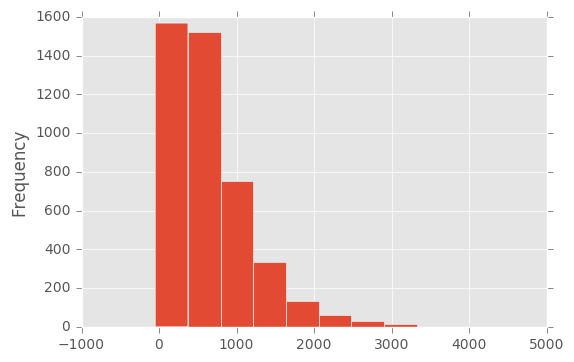

In [14]:
matches['t_first_kill'].plot(kind = 'hist')

# sen_log

In [15]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
sen_cnt = {
                'id':0,
                't_sen_cnt_3':0,
                't_sen_cnt_5':0,
                't_sen_cnt_8':0,
                't_sen_cnt_10':0,
                't_sen_cnt_12':0,
                't_sen_cnt_15':0,
                't_sen_cnt_20':0,
                't_sen_cnt_25':0,
                't_sen_cnt_30':0       
                }

sen = pd.DataFrame(columns = [key for key, value in sen_cnt.items()])

for i in range(0, len(matches['sen_log'])):
    
    if (i % 1000 == 0):
        print "%s Matches has been processed" %i
    
    sen_cnt = {
                'id':0,
                't_sen_cnt_3':0,
                't_sen_cnt_5':0,
                't_sen_cnt_8':0,
                't_sen_cnt_10':0,
                't_sen_cnt_12':0,
                't_sen_cnt_15':0,
                't_sen_cnt_20':0,
                't_sen_cnt_25':0,
                't_sen_cnt_30':0,
                't_sen_rpm_3':0,
                't_sen_rpm_5':0,
                't_sen_rpm_8':0,
                't_sen_rpm_10':0,
                't_sen_rpm_12':0,
                't_sen_rpm_15':0,
                't_sen_rpm_20':0,
                't_sen_rpm_25':0,
                't_sen_rpm_30':0    
                }
    try: 
        if matches['sen_log'][i] is not None:
            cumulative = 0
            for j in range(0, len(matches['sen_log'][i])):
                for timeStamp in timeStamps:
                    if matches['sen_log'][i][j]['time'] < int(timeStamp) * 60:
                        varName_cnt = "t_sen_cnt_" + timeStamp
                        varName_rpm = "t_sen_rpm_" + timeStamp
                        sen_cnt[varName_cnt] += 1
                        sen_cnt[varName_rpm] += 1 / float(timeStamp)
            sen_cnt['id'] = matches['id'][i]
            senRow = pd.DataFrame.from_dict(sen_cnt, orient = 'index').transpose()
            sen = sen.append(senRow, ignore_index=True)
        else: print "Line %s: Log does not exists" %i
    except Exception:
        print "Line %s: Unknown error" %i

0 Matches has been processed
1000 Matches has been processed
2000 Matches has been processed
3000 Matches has been processed
4000 Matches has been processed


In [16]:
matches = matches.merge(sen, left_on='id', right_on='id', how='inner')
matches.shape

(4430, 110)

# Возникают новые записи в таблице, хотя используется inner join. С чем это может быть связано?

# obs_log

In [17]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
obs_cnt = {
                'id':0,
                't_obs_cnt_3':0,
                't_obs_cnt_5':0,
                't_obs_cnt_8':0,
                't_obs_cnt_10':0,
                't_obs_cnt_12':0,
                't_obs_cnt_15':0,
                't_obs_cnt_20':0,
                't_obs_cnt_25':0,
                't_obs_cnt_30':0       
                }

obs = pd.DataFrame(columns = [key for key, value in obs_cnt.items()])

for i in range(0, len(matches['obs_log'])):
    
    if (i % 1000 == 0):
        print "%s Matches has been processed" %i
    
    obs_cnt = {
                'id':0,
                't_obs_cnt_3':0,
                't_obs_cnt_5':0,
                't_obs_cnt_8':0,
                't_obs_cnt_10':0,
                't_obs_cnt_12':0,
                't_obs_cnt_15':0,
                't_obs_cnt_20':0,
                't_obs_cnt_25':0,
                't_obs_cnt_30':0,
                't_obs_rpm_3':0,
                't_obs_rpm_5':0,
                't_obs_rpm_8':0,
                't_obs_rpm_10':0,
                't_obs_rpm_12':0,
                't_obs_rpm_15':0,
                't_obs_rpm_20':0,
                't_obs_rpm_25':0,
                't_obs_rpm_30':0    
                }
    try: 
        if matches['obs_log'][i] is not None:
            cumulative = 0
            for j in range(0, len(matches['obs_log'][i])):
                for timeStamp in timeStamps:
                    if matches['obs_log'][i][j]['time'] < int(timeStamp) * 60:
                        varName_cnt = "t_obs_cnt_" + timeStamp
                        varName_rpm = "t_obs_rpm_" + timeStamp
                        obs_cnt[varName_cnt] += 1
                        obs_cnt[varName_rpm] += 1 / float(timeStamp)
            obs_cnt['id'] = matches['id'][i]
            obsRow = pd.DataFrame.from_dict(obs_cnt, orient = 'index').transpose()
            obs = obs.append(obsRow, ignore_index=True)
        else: print "Line %s: Log does not exists" %i
    except Exception:
        print "Line %s: Unknown error" %i

0 Matches has been processed
1000 Matches has been processed
2000 Matches has been processed
3000 Matches has been processed
4000 Matches has been processed


In [18]:
matches = matches.merge(obs, left_on='id', right_on='id', how='inner')
print matches.shape

(4466, 128)


# runes_log

In [19]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
runes_cnt = {
                'id':0,
                't_runes_cnt_3':0,
                't_runes_cnt_5':0,
                't_runes_cnt_8':0,
                't_runes_cnt_10':0,
                't_runes_cnt_12':0,
                't_runes_cnt_15':0,
                't_runes_cnt_20':0,
                't_runes_cnt_25':0,
                't_runes_cnt_30':0       
                }

runes = pd.DataFrame(columns = [key for key, value in runes_cnt.items()])

for i in range(0, len(matches['runes_log'])):
    
    if (i % 1000 == 0):
        print "%s Matches has been processed" %i
    
    runes_cnt = {
                'id':0,
                't_runes_cnt_3':0,
                't_runes_cnt_5':0,
                't_runes_cnt_8':0,
                't_runes_cnt_10':0,
                't_runes_cnt_12':0,
                't_runes_cnt_15':0,
                't_runes_cnt_20':0,
                't_runes_cnt_25':0,
                't_runes_cnt_30':0,
                't_runes_rpm_3':0,
                't_runes_rpm_5':0,
                't_runes_rpm_8':0,
                't_runes_rpm_10':0,
                't_runes_rpm_12':0,
                't_runes_rpm_15':0,
                't_runes_rpm_20':0,
                't_runes_rpm_25':0,
                't_runes_rpm_30':0    
                }
    try:
        if matches['runes_log'][i] is not None:
            cumulative = 0
            for j in range(0, len(matches['runes_log'][i])):
                for timeStamp in timeStamps:
                    if matches['runes_log'][i][j]['time'] < int(timeStamp) * 60:
                        varName_cnt = "t_runes_cnt_" + timeStamp
                        varName_rpm = "t_runes_rpm_" + timeStamp
                        runes_cnt[varName_cnt] += 1
                        runes_cnt[varName_rpm] += 1 / float(timeStamp)
            runes_cnt['id'] = matches['id'][i]
            runesRow = pd.DataFrame.from_dict(runes_cnt, orient = 'index').transpose()
            runes = runes.append(runesRow, ignore_index=True)
        else: print "Line %s: Log does not exists" %i
    except Exception:
        print "Line %s: Unknown error" %i

0 Matches has been processed
1000 Matches has been processed
2000 Matches has been processed
3000 Matches has been processed
4000 Matches has been processed


In [20]:
matches = matches.merge(runes, left_on='id', right_on='id', how='inner')
matches.shape  

(5186, 146)

# buyback_log

In [21]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
buyback_cnt = {
                'id':0,
                't_buyback_cnt_3':0,
                't_buyback_cnt_5':0,
                't_buyback_cnt_8':0,
                't_buyback_cnt_10':0,
                't_buyback_cnt_12':0,
                't_buyback_cnt_15':0,
                't_buyback_cnt_20':0,
                't_buyback_cnt_25':0,
                't_buyback_cnt_30':0       
                }

buyback = pd.DataFrame(columns = [key for key, value in buyback_cnt.items()])

for i in range(0, len(matches['buyback_log'])):
    
    if (i % 1000 == 0):
        print "%s Matches has been processed" %i
    
    buyback_cnt = {
                'id':0,
                't_buyback_cnt_3':0,
                't_buyback_cnt_5':0,
                't_buyback_cnt_8':0,
                't_buyback_cnt_10':0,
                't_buyback_cnt_12':0,
                't_buyback_cnt_15':0,
                't_buyback_cnt_20':0,
                't_buyback_cnt_25':0,
                't_buyback_cnt_30':0,
                't_buyback_rpm_3':0,
                't_buyback_rpm_5':0,
                't_buyback_rpm_8':0,
                't_buyback_rpm_10':0,
                't_buyback_rpm_12':0,
                't_buyback_rpm_15':0,
                't_buyback_rpm_20':0,
                't_buyback_rpm_25':0,
                't_buyback_rpm_30':0    
                }
    try: 
        if matches['buyback_log'][i] is not None:
            cumulative = 0
            for j in range(0, len(matches['buyback_log'][i])):
                for timeStamp in timeStamps:
                    if matches['buyback_log'][i][j]['time'] < int(timeStamp) * 60:
                        varName_cnt = "t_buyback_cnt_" + timeStamp
                        varName_rpm = "t_buyback_rpm_" + timeStamp
                        buyback_cnt[varName_cnt] += 1
                        buyback_cnt[varName_rpm] += 1 / float(timeStamp)
            buyback_cnt['id'] = matches['id'][i]
            buybackRow = pd.DataFrame.from_dict(buyback_cnt, orient = 'index').transpose()
            buyback = buyback.append(buybackRow, ignore_index=True)
        else: print "Line %s: Log does not exists" %i
    except Exception:
        print "Line %s: Unknown error" %i

0 Matches has been processed
1000 Matches has been processed
2000 Matches has been processed
3000 Matches has been processed
4000 Matches has been processed
5000 Matches has been processed


In [22]:
matches = matches.merge(buyback, left_on='id', right_on='id', how='inner')
matches.shape

(201026, 164)

In [23]:
buyback.shape

(5186, 19)

# Откуда 4000 новых записей после Join, при условии, что таблица buyback содержит 10908 записей?

# Hero statistics

In [24]:
urlHeroes = "https://api.opendota.com/api/heroStats"

In [25]:
response = urllib2.urlopen(urlHeroes)
jsonResponse = response.read()
dictData = json.loads(jsonResponse)

In [26]:
heroesList = list()
heroAttr = [
            'id',
            'localized_name', 
            'attack_type',
            'pro_ban', 
            'pro_pick', 
            'pro_win', 
            'primary_attr', 
            'roles'
            ]
heroRolesList = [
                'Carry',
                'Disabler',
                'Initiator',
                'Jungler',
                'Support',
                'Durable',
                'Nuker',
                'Escape',
                'Pusher'
                ]

for heroId in range(0, len(dictData) - 1):    
    heroRaw = dict()
    
    for heroRole in heroRolesList:
        heroRaw[heroRole] = 0
    for key, value in dictData[heroId].iteritems():
        if key in heroAttr:
            heroRaw[key] = dictData[heroId][key]
            if key == 'roles':
                for heroRole in dictData[heroId][key]:
                    heroRaw[heroRole] = 1
    del heroRaw['roles']                
    heroesList.append(heroRaw)

In [27]:
heroes = pd.DataFrame(heroesList)
print heroes.shape
heroes.head()

(112, 16)


,Carry,Disabler,Durable,Escape,Initiator,Jungler,Nuker,Pusher,Support,attack_type,id,localized_name,primary_attr,pro_ban,pro_pick,pro_win
0,1,0,0,1,0,0,1,0,0,Melee,1,Anti-Mage,agi,67.0,48.0,22.0
1,0,1,1,0,1,1,0,0,0,Melee,2,Axe,str,209.0,194.0,103.0
2,0,1,1,0,0,0,1,0,1,Ranged,3,Bane,int,1.0,19.0,10.0
3,1,1,0,0,1,1,1,0,0,Melee,4,Bloodseeker,agi,5.0,17.0,7.0
4,0,1,0,0,0,1,1,0,1,Ranged,5,Crystal Maiden,int,57.0,410.0,229.0


In [28]:
matches= matches.merge(heroes, left_on = 'hero_id', right_on = 'id', how = 'inner')
matches.shape

(200954, 180)

In [63]:
matches.head()

,account_id,assists,attack_type_x,buyback_log,camps_stacked,cluster,creeps_stacked,deaths,duration,first_blood_time,...,Nuker,Pusher,Support,attack_type_y,id_y,localized_name_y,primary_attr_y,pro_ban,pro_pick,pro_win
0,89166519,19,Ranged,[],0.0,224,0.0,3,1454,0,...,1,0,1,Ranged,20,Vengeful Spirit,agi,97.0,219.0,106.0
1,135878232,13,Ranged,[],0.0,224,0.0,2,1479,65,...,1,0,1,Ranged,20,Vengeful Spirit,agi,97.0,219.0,106.0
2,89166519,4,Ranged,[],0.0,224,0.0,6,1524,3,...,1,0,1,Ranged,20,Vengeful Spirit,agi,97.0,219.0,106.0
3,90892734,14,Ranged,"[{u'slot': 4, u'type': u'buyback_log', u'playe...",0.0,224,0.0,6,2983,4,...,1,0,1,Ranged,20,Vengeful Spirit,agi,97.0,219.0,106.0
4,90892734,12,Ranged,"[{u'slot': 9, u'type': u'buyback_log', u'playe...",0.0,224,0.0,4,1859,76,...,1,0,1,Ranged,20,Vengeful Spirit,agi,97.0,219.0,106.0


# EXP_RPM

In [29]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
var = 'experience'
varTemplate = 't_' + var + '_'
for timeStamp in timeStamps:
    varName_cnt = varTemplate + 'cnt_' + timeStamp
    varName_rpm = varTemplate + 'rpm_' + timeStamp
    matches[varName_rpm] = matches[varName_cnt] / float(timeStamp)

# GOLD_RPM

In [30]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
var = 'gold'
varTemplate = 't_' + var + '_'
for timeStamp in timeStamps:
    varName_cnt = varTemplate + 'cnt_' + timeStamp
    varName_rpm = varTemplate + 'rpm_' + timeStamp
    matches[varName_rpm] = matches[varName_cnt] / float(timeStamp)

# LASTHITS_RPM

In [31]:
timeStamps = [
              '3',
              '5',
              '8',
              '10',
              '12',
              '15',
              '20',
              '25',
              '30'
             ]
var = 'lasthits'
varTemplate = 't_' + var + '_'
for timeStamp in timeStamps:
    varName_cnt = varTemplate + 'cnt_' + timeStamp
    varName_rpm = varTemplate + 'rpm_' + timeStamp
    matches[varName_rpm] = matches[varName_cnt] / float(timeStamp)

In [32]:
for col in list(matches):
    print col

account_id
assists
attack_type_x
buyback_log
camps_stacked
cluster
creeps_stacked
deaths
denies
duration
first_blood_time
gold_per_min
gold_spent
hero_damage
hero_healing
hero_id
kills
kills_log
last_hits
leagueid
leaguename
level
localized_name_x
match_id
obs_log
ping_log
player_slot
primary_attr_x
purchase_log
role_log
runes_log
sen_log
start_time
stuns
t_experience_cnt_10
t_experience_cnt_12
t_experience_cnt_15
t_experience_cnt_20
t_experience_cnt_25
t_experience_cnt_3
t_experience_cnt_30
t_experience_cnt_5
t_experience_cnt_8
t_gold_cnt_10
t_gold_cnt_12
t_gold_cnt_15
t_gold_cnt_20
t_gold_cnt_25
t_gold_cnt_3
t_gold_cnt_30
t_gold_cnt_5
t_gold_cnt_8
t_lasthits_cnt_10
t_lasthits_cnt_12
t_lasthits_cnt_15
t_lasthits_cnt_20
t_lasthits_cnt_25
t_lasthits_cnt_3
t_lasthits_cnt_30
t_lasthits_cnt_5
t_lasthits_cnt_8
team_id
tower_damage
win
xp_per_min
id_x
datetime
t_item_aether_lens
t_item_arcane_boots
t_item_black_king_bar
t_item_blade_mail
t_item_blink
t_item_boots
t_item_bottle
t_item_desolat

# Заметка: после join появляются id_x и id_y - айдишники правых и левых таблиц

In [33]:
print matches['id_x'].unique().size

4349


In [34]:
print matches['id_y'].unique().size

110


# Используем id_x в качестве уникального id.
Аналог SQL select distinct id_x from matches (Удаляем дубликаты)

In [35]:
matches.drop_duplicates(subset = 'id_x', inplace = True)

In [36]:
matches.shape

(4349, 207)

In [37]:
matchesWithoutLogs = matches.drop(labels = ['buyback_log', 'kills_log', 'obs_log', 'ping_log', 'purchase_log', 'role_log', 'runes_log', 'sen_log'], axis = 1)

In [38]:
matchesWithoutLogs.to_csv('ABT_20_04_2017_withKills.csv', na_rep = 'NaN', sep = ';')